In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\A2010578\OneDrive\Github\EBA-3500\site':
  os.chdir(r'C:\Users\A2010578\OneDrive\Github\EBA-3500\site')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\A2010578\AppData\Local\Temp\ipykernel_16128\1491666059.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Pyth

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
bank = pd.read_csv(url)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
import numpy as np
betas = [-6, 0.05, 1]
f = lambda x: np.exp(betas[0] + x[0] * betas[1] + x[1] * betas[2]) / (1 + np.exp(betas[0] + x[0] * betas[1] + x[1] * betas[2]))
f([40, 3.5])

0.37754066879814546

In [4]:
boston = pd.read_csv("Boston.csv")
boston.info()
boston["crime_new"] = 1 * (boston.crim >= np.median(boston.crim))
boston.corr().crime_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


Unnamed: 0    0.369430
crim          0.409395
zn           -0.436151
indus         0.603260
chas          0.070097
nox           0.723235
rm           -0.156372
age           0.613940
dis          -0.616342
rad           0.619786
tax           0.608741
ptratio       0.253568
lstat         0.453263
medv         -0.263017
crime_new     1.000000
Name: crime_new, dtype: float64

In [5]:
import statsmodels.formula.api as smf
smf.logit("crime_new ~ nox + dis + tax + indus", data = boston).fit().summary()

Optimization terminated successfully.
         Current function value: 0.302879
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              crime_new   No. Observations:                  506
Model:                          Logit   Df Residuals:                      501
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.5630
Time:                        13:48:41   Log-Likelihood:                -153.26
converged:                       True   LL-Null:                       -350.73
Covariance Type:            nonrobust   LLR p-value:                 3.429e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.9814      2.810     -7.112      0.000     -25.488     -14.475
nox           36.0183      5.110      7.049      0.000      26.003      46.033
dis            0.1090      0.130      0.837      0.402      -0.146       0.364
tax            0.0037      0.001      2.692      0.007       0.001       0.006
indus         -0.1046      0.038     -2.785      0.005      -0.178      -0.031
==============================================================================
"""

In [6]:
smf.logit("crime_new ~ nox + dis + tax + indus", data = boston).fit().aic
smf.logit("crime_new ~ nox + tax + indus", data = boston).fit().aic

Optimization terminated successfully.
         Current function value: 0.302879
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303562
         Iterations 8


315.20515267105964

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [8]:
hurr = pd.read_excel("hurricanes.xlsx").drop(["RowNames", "Number"], axis = 1)

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
hurr.drop("Name", axis = 1).corr()

,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
Year,1.000000,0.194502,0.061686,0.146470,0.036905,0.203846,0.023999,0.112338,-0.108181
Type,0.194502,1.000000,0.662654,-0.067350,0.525167,0.154305,0.159709,0.153903,-0.413241
FirstLat,0.061686,0.662654,1.000000,-0.136393,0.854849,0.163005,0.369432,0.216586,-0.530203
FirstLon,0.146470,-0.067350,-0.136393,1.000000,0.018821,0.849398,0.450712,0.712697,0.133285
MaxLat,0.036905,0.525167,0.854849,0.018821,1.000000,0.223451,0.604356,0.351265,-0.295264
MaxLon,0.203846,0.154305,0.163005,0.849398,0.223451,1.000000,0.477417,0.849161,-0.158521
LastLat,0.023999,0.159709,0.369432,0.450712,0.604356,0.477417,1.000000,0.669348,0.071727
LastLon,0.112338,0.153903,0.216586,0.712697,0.351265,0.849161,0.669348,1.000000,-0.156770
MaxInt,-0.108181,-0.413241,-0.530203,0.133285,-0.295264,-0.158521,0.071727,-0.156770,1.000000


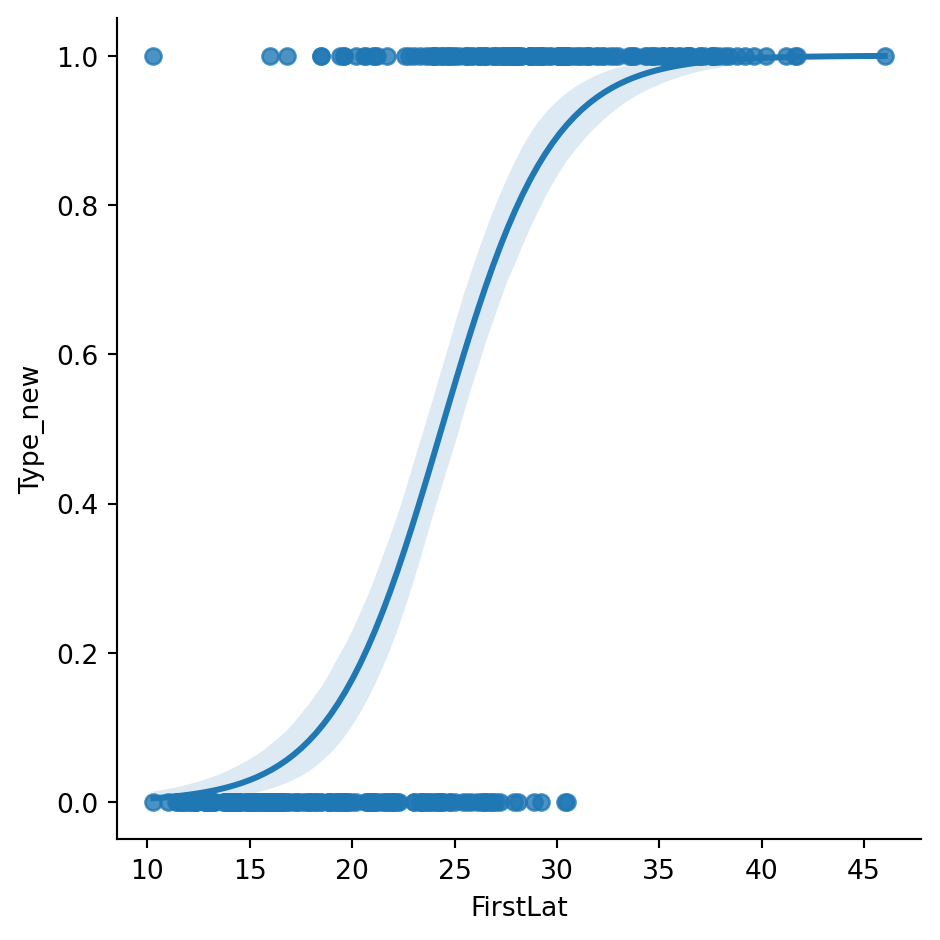

In [10]:
hurr["Type_new"] = (1 - 1 * (hurr["Type"] == 0))
sns.lmplot(hurr, x = "FirstLat", y = "Type_new", logistic = True)
plt.show()

In [11]:
import statsmodels.formula.api as smf

smf.logit("Type_new ~ FirstLat + MaxLat+ LastLon + MaxInt", data = hurr).fit().aic
smf.logit("Type_new ~ FirstLat + LastLon + MaxInt", data = hurr).fit().aic
smf.logit("Type_new ~ FirstLat + MaxLat+ LastLat + LastLon + MaxInt", data = hurr).fit().aic
smf.logit("Type_new ~ FirstLat + MaxLon + MaxLat+ LastLat + LastLon + MaxInt", data = hurr).fit().aic
smf.probit("Type_new ~ FirstLat + MaxLon + MaxLat+ LastLat + LastLon + MaxInt", data = hurr).fit().aic
smf.probit("Type_new ~ FirstLat + MaxLat+ LastLat + LastLon + MaxInt", data = hurr).fit().aic

Optimization terminated successfully.
         Current function value: 0.328329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336899
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307908
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307814
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308249
         Iterations 7


219.75953818954733